In [1]:
import torch

w: 0.820231020450592 b: 0.9878857135772705


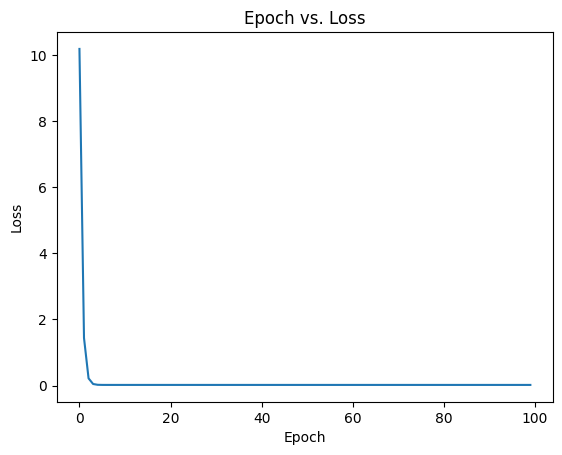

In [17]:
#q1
import matplotlib.pyplot as plt

# Data
x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,15.1,16.1,16.8,15.2,17.0,17.2,18.6])

# Model parameters
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Hyperparameters
learning_rate = torch.tensor(0.001)
epochs = 100

# Training loop
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    
    # Backward pass
    loss.backward()
    
    # Update weights and biases
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        
        # Zero gradients
        w.grad.zero_()
        b.grad.zero_()
    
    # Save loss for plotting
    losses.append(loss.item())
print("w:",w.item(),"b:",b.item())
# Plotting
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.show()


In [19]:
#q2
x = torch.tensor([2, 4], dtype=torch.float32)
y = torch.tensor([20, 40], dtype=torch.float32)

# Initial values
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Learning rate
learning_rate = 0.001

# Number of data points
N = len(x)

# Training loop for 2 epochs
for epoch in range(2):
    # Forward pass
    y_pred = w * x + b
    # Loss
    loss = torch.mean((y_pred - y)**2)
    # Backward pass
    loss.backward()
    
    # Analytical gradients
    w_grad_analytical = torch.mean(2 * x * (y_pred - y))
    b_grad_analytical = torch.mean(2 * (y_pred - y))
    
    # Update weights and biases using analytical gradients
    with torch.no_grad():
        w -= learning_rate * w_grad_analytical
        b -= learning_rate * b_grad_analytical
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
# Print the results
print("Analytical gradients:")
print("w.grad:", w_grad_analytical.item())
print("b.grad:", b_grad_analytical.item())
print("Updated parameters:")
print("w:", w.item())
print("b:", b.item())

Analytical gradients:
w.grad: -170.20799255371094
b.grad: -50.85199737548828
Updated parameters:
w: 1.344208002090454
b: 1.1028521060943604


After 0 epochs, The parameters are w=tensor([0.5051], requires_grad=True),b=tensor([0.5442], requires_grad=True), and loss =339.3275146484375
After 10 epochs, The parameters are w=tensor([0.7683], requires_grad=True),b=tensor([0.5665], requires_grad=True), and loss =332.3392639160156
After 20 epochs, The parameters are w=tensor([1.0286], requires_grad=True),b=tensor([0.5888], requires_grad=True), and loss =325.5032958984375
After 30 epochs, The parameters are w=tensor([1.2852], requires_grad=True),b=tensor([0.6110], requires_grad=True), and loss =318.85260009765625
After 40 epochs, The parameters are w=tensor([1.5373], requires_grad=True),b=tensor([0.6331], requires_grad=True), and loss =312.4300231933594
After 50 epochs, The parameters are w=tensor([1.7836], requires_grad=True),b=tensor([0.6550], requires_grad=True), and loss =306.28900146484375
After 60 epochs, The parameters are w=tensor([2.0228], requires_grad=True),b=tensor([0.6766], requires_grad=True), and loss =300.491851806640

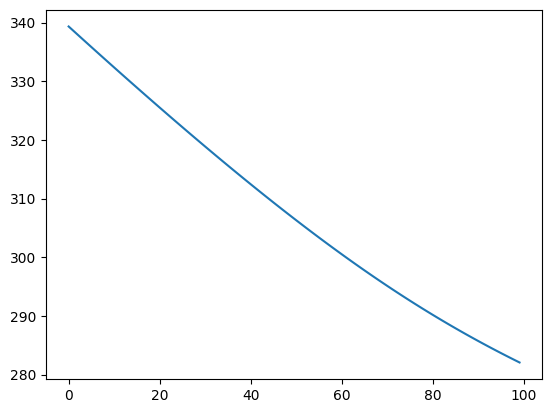

In [31]:
#q3
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x)
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()
    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

plt.plot(loss_list)


[tensor([ 7., 16., 12.,  5.]), tensor([120., 210., 180.,  40.])]
[tensor([20.]), tensor([240.])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([13.5834], requires_grad=True),b=Parameter containing:
tensor([1.7535], requires_grad=True), and loss =562.252197265625
After 10 epochs, The parameters are w=Parameter containing:
tensor([13.2370], requires_grad=True),b=Parameter containing:
tensor([1.9545], requires_grad=True), and loss =95.56885528564453
After 20 epochs, The parameters are w=Parameter containing:
tensor([13.7640], requires_grad=True),b=Parameter containing:
tensor([2.4337], requires_grad=True), and loss =1837.594482421875
After 30 epochs, The parameters are w=Parameter containing:
tensor([9.0899], requires_grad=True),b=Parameter containing:
tensor([2.5109], requires_grad=True), and loss =3137.7666015625
After 40 epochs, The parameters are w=Parameter containing:
tensor([13.4553], requires_grad=True),b=Parameter containing:
tensor([3.2072], requires_grad=Tru

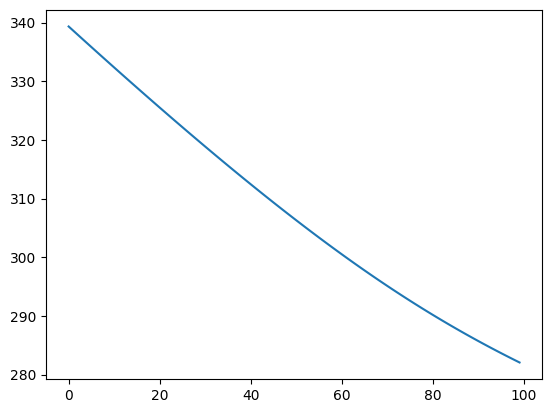

In [32]:
#q4
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

plt.plot(loss_list)


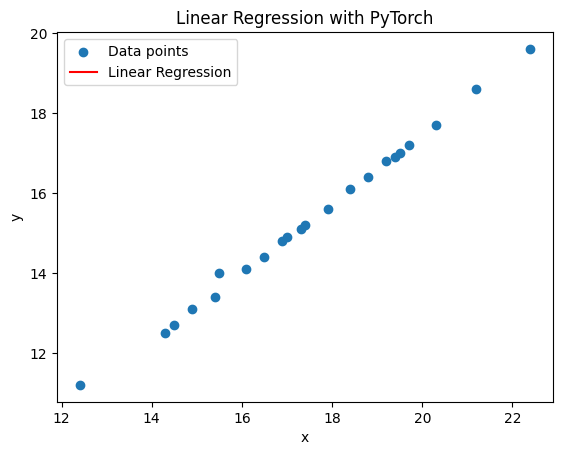

In [30]:
#q5
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Data
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32).view(-1, 1)

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the results
plt.scatter(x.numpy(), y.numpy(), label='Data points')
plt.plot(x.numpy(), outputs.detach().numpy(), color='red', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with PyTorch')
plt.show()

In [28]:
#q6
import torch
import torch.nn as nn
import torch.optim as optim

# Data
subject = [1, 2, 3, 4, 5]
x1 = [3, 4, 5, 6, 2]
x2 = [8, 5, 7, 3, 1]
y = [-3.7, 3.5, 2.5, 11.5, 5.7]

# Convert data to PyTorch tensors
subject = torch.tensor(subject, dtype=torch.float32).view(-1, 1)
x1 = torch.tensor(x1, dtype=torch.float32).view(-1, 1)
x2 = torch.tensor(x2, dtype=torch.float32).view(-1, 1)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Combine input features into one tensor
X = torch.cat((subject, x1, x2), 1)

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Verify the answer for the data point x1=3, x2=2
test_data = torch.tensor([3, 3, 2], dtype=torch.float32).view(1, -1)
predicted_value = model(test_data)
print("Predicted value:", predicted_value.item())


Predicted value: 5.610202312469482


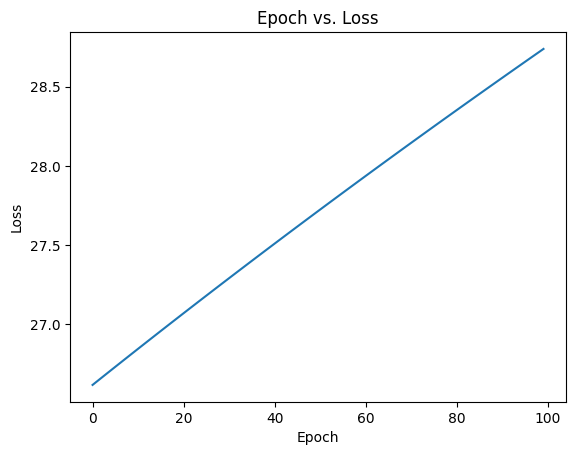

Predicted Probability: 5.633886152739409e-12
Predicted Class: 0


In [22]:
#q7
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)

# Logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Model, loss function, and optimizer
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)

    # Calculate loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    losses.append(loss.item())

# Plotting
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.show()

# Testing the model
with torch.no_grad():
    test_input = torch.tensor([30], dtype=torch.float32).view(-1, 1)
    predicted_prob = model(test_input).item()
    predicted_class = 1 if predicted_prob > 0.5 else 0

    print(f"Predicted Probability: {predicted_prob}")
    print(f"Predicted Class: {predicted_class}")
